In [1]:
import numpy as np
import pandas as pd
import os
import multiprocessing as mul
from multiprocessing import Process
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from IPython.display import clear_output
from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import gaussian_kde
import scipy.stats as sct
from astropy.coordinates import SkyCoord as scr
from astropy import units as u

In [2]:
####
#### IMPORTING AND SPLITTING ICDATA $$$


path = "/media/darkwake/VIB2/Project-IceCube/icecube_10year_ps/events"
filenames = ["IC40_exp.csv", "IC59_exp.csv","IC79_exp.csv", "IC86_I_exp.csv", "IC86_II_exp.csv",
"IC86_III_exp.csv", "IC86_IV_exp.csv", "IC86_V_exp.csv", "IC86_VI_exp.csv", "IC86_VII_exp.csv"]
file = filenames[0]
f = open(os.path.join(path, file), 'r')
lines = f.readlines()
column=lines[0].split()
column.pop(0)
content = []
for file in filenames:
    f = open(os.path.join(path, file), 'r')
    lines = f.readlines()
    for line in lines[1:]:
        content.append(line.split())
    f.close()
icdata = pd.DataFrame(content, columns=column)
icdata['log10(E/GeV)'] = [float(i) for i in icdata['log10(E/GeV)']]


In [3]:


#IMPORTING MSPDATA
f = open("/media/darkwake/VIB2/Project-IceCube/allpsr.txt", 'r')
lines = f.readlines()

content=[]
column=lines.pop(0).split()
for line in lines[:]:
    content.append(line.split())
    #the INITAL DATABASE IS CLUTTERED SO WE REMOVE THE NULL COLUMNS AND OTHER CLUTTER
mspdata = pd.DataFrame(content).dropna().drop_duplicates()#.drop(range(0,6)).dropna().drop([2,6,8,10,11,13,14], axis=1)
f.close()
line = []
lines = []

mspdata.columns = column
column = []
content=[]
mspdata = mspdata.sort_values('DECJD')
mspdata.dropna(inplace=True)
mspdata = mspdata.reset_index()
mspdata = mspdata.drop(["index", "#"], axis=1)

In [4]:
icdata

,MJD[days],log10(E/GeV),AngErr[deg],RA[deg],Dec[deg],Azimuth[deg],Zenith[deg]
0,54562.37911273,3.31,0.48,203.024,16.760,218.374,106.712
1,54562.38662244,5.17,0.62,75.024,-13.371,349.100,76.646
2,54562.38789162,3.92,0.56,97.501,11.290,327.060,101.291
3,54562.39267689,5.57,1.13,305.857,-33.932,120.413,56.090
4,54562.40477593,5.80,1.11,143.516,-38.279,287.171,51.684
...,...,...,...,...,...,...,...
1134445,58307.96110988,5.14,0.20,221.246,-59.959,141.239,29.956
1134446,58307.96266638,2.94,1.23,191.547,4.415,171.627,94.312
1134447,58307.96355617,2.88,0.30,308.127,42.543,55.437,132.606
1134448,58307.96397167,2.98,0.21,332.199,44.720,31.489,134.811


In [5]:
mspdata

,NAME,Gl,Gb,RAJD,DECJD,P0,F0,DIST
0,J1852-0000,33.066,-0.277,283.16736,-0.00708,1.92066632921,0.520652642675,5.776
1,J1843-0000,32.013,1.768,280.86652,-0.01153,0.880334321703,1.13593208324,3.336
2,J1849-0001,32.638,0.527,282.2568,-0.02151,0.038522586319205,25.958797047369,*
3,J1852-0002g,32.985,-0.177,283.04,-0.03,0.2451,4.079967,5.591
4,J1850-0002g,32.738,0.305,282.5,-0.03,0.89336,1.11937,5.732
...,...,...,...,...,...,...,...,...
3238,J0152+0948,146.812,-50.221,28.0989,9.8028,2.74664729014,0.364080238329,2.477
3239,J1908+0949g,43.562,0.797,287.03,9.82,0.00905,110.497238,6.001
3240,J0550+09,197.055,-8.774,87.6,9.85,1.745,0.573066,1.804
3241,B1914+09,44.556,-1.019,289.134769,9.857216,0.2702544395645,3.700216735057,1.904


In [13]:
msra = np.array([float(i) for i in mspdata['RAJD']])
msdec = np.array([float(i) for i in mspdata['DECJD']])
icra = np.array([float(i) for i in icdata['RA[deg]']])
icdec = np.array([float(i) for i in icdata['Dec[deg]']])
icang = np.array([float(i) for i in icdata['AngErr[deg]']])
global p, lg
p = len(msra)
lg = len(icra) // p + 1
#cut = 20
#cone = 3
#psrno = 0

In [ ]:
m

In [21]:
icra[0:12]

array([203.024,  75.024,  97.501, 305.857, 143.516, 310.767, 147.017,
       115.22 , 236.214, 343.547, 263.345, 262.551])

In [19]:
aa = [0, 3, 6, 9, 12]
icra[aa]

array([203.024, 305.857, 147.017, 343.547,  96.531])

In [35]:
def hvovec(lon1, lat1, lon2, lat2, rad=False):

    #Convert decimal degrees to Radians:
    lon1 = np.deg2rad(lon1)
    lat1 = np.deg2rad(lat1)
    lon2 = np.deg2rad(lon2)
    lat2 = np.deg2rad(lat2)

    #Implementing Haversine Formula: 
    dlon = np.subtract(lon2, lon1)
    #dlat = np.subtract(lat2, lat1)

    a = np.add(np.multiply(np.sin(lat1), np.sin(lat2)), np.multiply(np.multiply(np.cos(lat1), np.cos(lat2)), np.cos(dlon)))

    if rad == True:
        return np.arccos(a)
    else:
        return np.abs(np.rad2deg(np.arccos(a)))


def angdecfinder(psrno, declcut):
    #aang = hvovec(msra[psrno], msdec[psrno], icra, icdec)
    decdf = list(np.abs(np.subtract(icdec, msdec[psrno])))
    nuind = []
    for i in range(0, len(decdf)):
        if decdf[i] < declcut:
            nuind.append(i)
            #decdf.pop(i)
            #aang[i] = -1
    fdecdf = list(np.abs(np.subtract(icdec[nuind], msdec[psrno])))
    return [nuind, decdf]

def S_ij(psrno, nuind): 
    ang2 = hvovec(msra[psrno], msdec[psrno], icra[nuind], icdec[nuind], rad=True) ** 2
    sg = np.deg2rad(icang[nuind]) ** 2
    return np.exp(-1 * ang2 / (2 * sg)) / (2 * np.pi * sg)

def bgs(psrno, cone):
    s_ang = (np.sin(np.deg2rad(msdec[psrno] + cone)) - np.sin(np.deg2rad(msdec[psrno] - cone)))*(2 * np.pi)
    return 1/s_ang

def Pr(x, Ns, S, B):
    nsN = x/Ns
    return np.add(np.multiply(nsN , S), np.multiply(np.subtract(1, nsN), B))

def TS(i, x, S, B, Ns):
    return 2*np.sum(np.log(Pr(x,  Ns, S, B)/B))


def ns_for_TSmax(i, S, B, Ns):
    #returns the TSmax for i^th GRB
    nll = lambda x: -TS(i,x, S, B, Ns)
    soln = minimize(nll, 3 ,bounds=((0,None),))
    ns = float(soln.x)
    return ns

In [39]:
def singpsr(psrno):
    cut = 5
    cone = 5
    nuind, decdf = angdecfinder(psrno, cut)
    S = S_ij(psrno, nuind)
    B = bgs(psrno, cone)
    Ns = len(nuind)
    maxns = ns_for_TSmax(psrno, S, B, Ns)
    return [maxns, TS(psrno, maxns, S, B, Ns)]

tsmax = []
errpsr = []
pool = mul.Pool(8, maxtasksperchild=800)
op_async = pool.map_async(singpsr, range(p))
tsmax = op_async.get()
op_async = []
pool = []
'''
for i in range(p):
    #try:
    tsmax.append(singpsr2(i))
    #except TypeError:
     #   errpsr.append(i)'''
maxns = []
sqrtts = []
for i in tsmax:
    maxns.append(i[0])
    sqrtts.append(i[1])

In [37]:
singpsr(338)

[0.0, 0.0]

71395


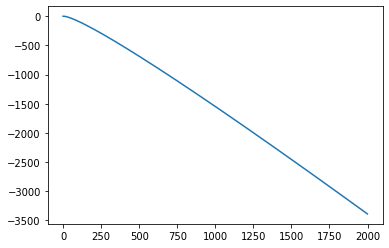

-3391.6436291165714


In [44]:
def plotpsr(psrno):
    cut = 5
    cone = 5
    nuind, decdf = angdecfinder(psrno, cut)
    S = S_ij(psrno, nuind)
    B = bgs(psrno, cone)
    Ns = len(nuind)
    tns=[TS(psrno, i, S, B, Ns) for i in range(0, 2000)]
    print(Ns)
    plt.plot(range(0, 2000), tns)
    plt.show()
    print(TS(psrno, 2000, S, B, Ns))
plotpsr(660)

In [89]:
binnedsts, wsts = np.histogram(sqrtts, 10)

ne01 = 3
amp  = p/3.0#np.sum(binnedsts)/ne01
#binnedsts = binnedsts/amp
yerr = np.sqrt(binnedsts)
b2 = binnedsts[(binnedsts>10)]
yerr2 = yerr[(binnedsts>10)]
x=0.5*(wsts[1:]+ wsts[:-1])
x2 = x[(binnedsts>10)]
xerr=x[0]-wsts[0]

In [108]:
yerr

array([52.88667129, 15.06651917, 10.81665383,  7.28010989,  5.38516481,
        3.46410162,  2.        ,  1.        ,  1.        ,  1.41421356])

In [94]:
wsts

array([ 0.        ,  1.22681665,  2.4536333 ,  3.68044994,  4.90726659,
        6.13408324,  7.36089989,  8.58771653,  9.81453318, 11.04134983,
       12.26816648])

In [102]:
#gaussian = lambda x, mean, var:  amp*norm.pdf(x, mean, var)
def gaussian(x,mean,sd):
#    mean=0.114
    A=p/1
    return A*np.exp(-(x - mean) ** 2.0 / sd ** 2.0)
loggaussian = lambda x, mean, var:  np.log(gaussian(x, mean, var))
gparam, gerr = curve_fit(loggaussian, x2, b2,  p0=[0.1, 1.0],sigma=yerr2, absolute_sigma=True, maxfev = 10000)#, method='trf')
gx = np.linspace(0, wsts[-1], 100)

kde = lambda x, binnedsts, var: max(b2)*gaussian_kde.pdf()
kparam, kerr = curve_fit(kde, x2, b2,  p0=[0.1, 1.0],sigma=yerr2, absolute_sigma=True, maxfev = 100000, method='dogbox')
kx = np.linspace(0, max(wsts), 100)

In [103]:
gparam

array([ 3.15171235, 25.21872013])

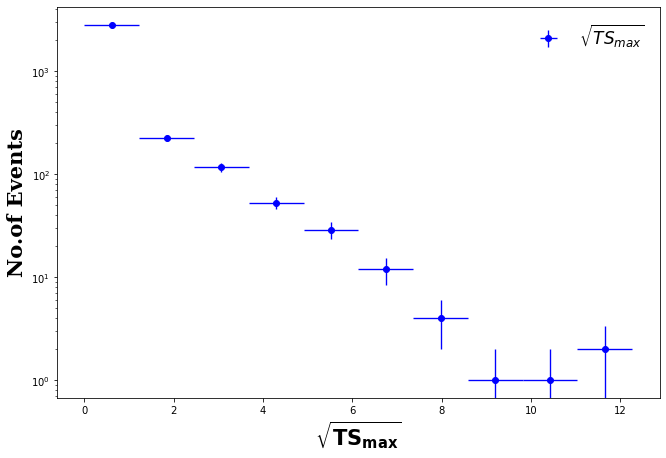

In [107]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 21,
        }
plt.figure(figsize=(10.8,7.2))
#plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], fontsize=18, fontweight='bold')
plt.yscale('log')
#plt.yticks([1, 10, 100, 1000, 10000], [1, 10, 100, 1000, 10000], fontsize=18, fontweight='bold')

plt.errorbar(x, binnedsts, xerr=xerr,yerr=yerr,  aa = True, barsabove = True, fmt='ob',ecolor='blue', elinewidth=1.35, label='$\sqrt{TS_{max}}$')
#plt.plot(gx,loggaussian(gx, gparam[0], gparam[1]),'--', alpha=0.6, label=f'Gaussian Fit', color='darkred', lw=2.2)

plt.xlabel("$\mathbf{\sqrt{TS_{max}}}$", fontweight='bold', fontdict=font)
plt.ylabel("No.of Events", fontweight='bold', fontdict=font)
#plt.grid(True, which='major')
legend =plt.legend(prop={'size':17}, framealpha=0)
legend.get_frame().set_facecolor('none')
plt.savefig("outputs/sqrt(TSmax)final.pdf")
plt.show()

In [95]:
binnedsts

array([2797,  227,  117,   53,   29,   12,    4,    1,    1,    2])

In [109]:
#arr = [i  for i in range(len(sqrtts)) if sqrtts[i] < 0.01]
#len(arr)
#psra = [msra[i] for i in arr]
#psdec = [msdec[i] for i in arr]
psra = msra
psdec = msdec
psra2 = np.deg2rad([(i + 180)%360 - 180 for i in psra])
#[psra[0], psra2[0]]
psra = np.deg2rad(psra)
psdec = np.deg2rad(psdec)
p3 =[]
for i in psra2:
    if i < 0 and i > np.deg2rad(-110):
        p3.append(i)

radec = scr(ra = msra * u.degree, dec = msdec * u.degree, frame = 'icrs')           #CONVERSION
radec = radec.galactic      #CONVERSION FROM RA,DEC TO GALACTIC COORDINATES

gl = [(i + np.pi)%(2*np.pi) - np.pi for i in radec.l.radian]
gb = radec.b.radian

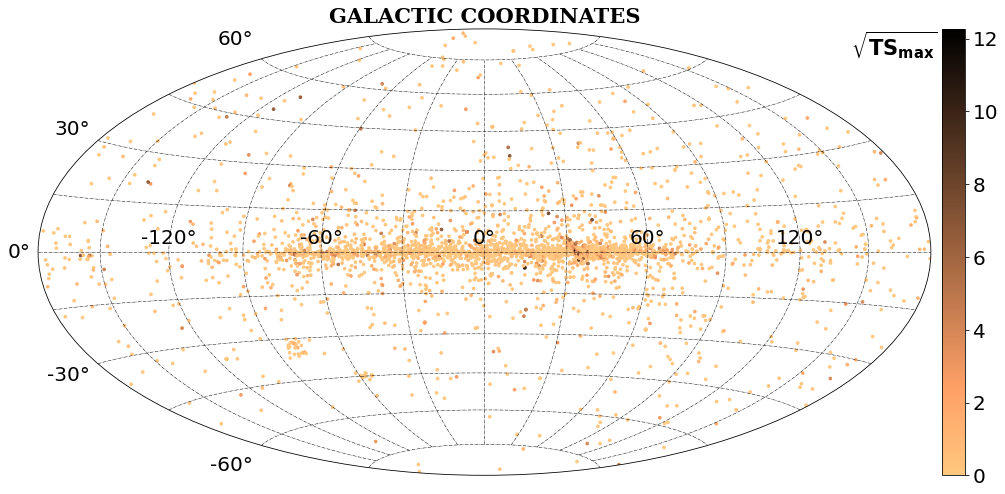

In [117]:
comap = 'copper_r'
fig = plt.figure(figsize=(16, 10))
plt.rcParams.update({'font.size': 20})
ax2 = plt.subplot(projection='hammer')
plott = ax2.scatter(gl, gb,marker='o', c=sqrtts, cmap=comap, s = 7, label='Pulsars')
plt.title("GALACTIC COORDINATES", fontdict=font)
#ax2.scatter(msra, msdec,marker='o',color='b', s = 1.2)
#ax2.scatter(icra, icdec, marker='.',color='green', alpha=0.05, s = 0.1)
ax2.xaxis.set_major_locator(plt.FixedLocator(np.pi / 3 * np.linspace(-2,2, 5)))
ax2.xaxis.set_minor_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-5, 5, 11)))
ax2.yaxis.set_major_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-2, 2, 5)))
ax2.yaxis.set_minor_locator(plt.FixedLocator(np.pi / 12 * np.linspace(-5, 5, 11)))
ax2.grid(True, which='both', color='black', lw=0.5, ls='-.')
#ax2.axvspan(min(p3), max(p3), color='pink', alpha=0.5)
#ax2.set_title('PULSARS WITH TSmax ~0\nHAMMER projection \n', fontdict=font)

cax = fig.add_axes([ax2.get_position().x1+0.01,ax2.get_position().y0,0.02,ax2.get_position().height])
cbar = fig.colorbar(plott, cax=cax)
cbar.set_label('$\mathbf{\sqrt{TS_{max}}}$\n\n', loc='top', rotation=0,labelpad=-60, fontdict=font)
#plt.suptitle(filenamewithpath.replace('icecube_10year_ps/events/','').replace('_exp','') + ' GALACTIC')

plt.savefig('outputs/psr-tsmax_hmp-HP-Galactic.pdf')
plt.show()

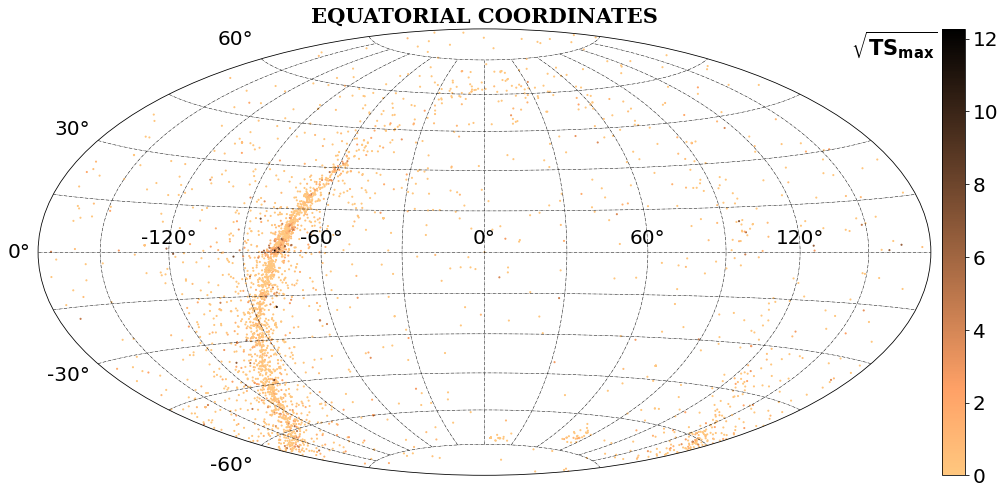

In [116]:
#PLOT RA, DEC
comap = 'copper_r'
fig = plt.figure(figsize=(16, 10))
plt.rcParams.update({'font.size': 20})
ax2 = plt.subplot(projection='hammer')
plott = ax2.scatter(psra2, psdec,marker='o', c=sqrtts, cmap=comap, s = 1.2, label='Pulsars')
plt.title("EQUATORIAL COORDINATES", fontdict=font)
#ax2.scatter(msra, msdec,marker='o',color='b', s = 1.2)
#ax2.scatter(icra, icdec, marker='.',color='green', alpha=0.05, s = 0.1)
ax2.xaxis.set_major_locator(plt.FixedLocator(np.pi / 3 * np.linspace(-2,2, 5)))
ax2.xaxis.set_minor_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-5, 5, 11)))
ax2.yaxis.set_major_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-2, 2, 5)))
ax2.yaxis.set_minor_locator(plt.FixedLocator(np.pi / 12 * np.linspace(-5, 5, 11)))
ax2.grid(True, which='both', color='black', lw=0.5, ls='-.')
#ax2.axvspan(min(p3), max(p3), color='pink', alpha=0.5)
#ax2.set_title('PULSARS WITH TSmax ~0\nHAMMER projection \n', fontdict=font)

cax = fig.add_axes([ax2.get_position().x1+0.01,ax2.get_position().y0,0.02,ax2.get_position().height])
cbar = fig.colorbar(plott, cax=cax)
cbar.set_label('$\mathbf{\sqrt{TS_{max}}}$\n\n', loc='top', rotation=0,labelpad=-60, fontdict=font)
#plt.suptitle(filenamewithpath.replace('icecube_10year_ps/events/','').replace('_exp','') + ' GALACTIC')

plt.savefig('outputs/psr-tsmax_hmp-HP.pdf')
plt.show()
